<a href="https://colab.research.google.com/github/maheshyadav007/random_experiements/blob/main/2D_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

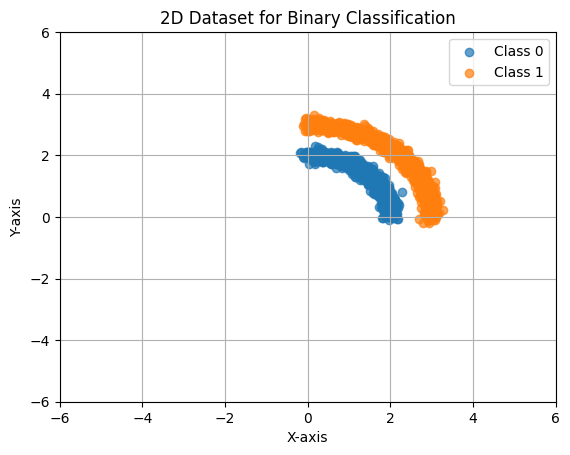

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points for each class
num_points = 1000

# Generate class 0 data points on a circle with radius 2
theta_0 = np.linspace(0, np.pi/2, num_points)
radius_0 = 2
class_0_x = radius_0 * np.cos(theta_0) + np.random.normal(0, 0.1, num_points)
class_0_y = radius_0 * np.sin(theta_0) + np.random.normal(0, 0.1, num_points)

# Generate class 1 data points on a circle with radius 4
theta_1 = np.linspace(0, np.pi/2, num_points)
radius_1 = 3
class_1_x = radius_1 * np.cos(theta_1) + np.random.normal(0, 0.1, num_points)
class_1_y = radius_1 * np.sin(theta_1) + np.random.normal(0, 0.1, num_points)

# Plot the generated data points
plt.scatter(class_0_x, class_0_y, label='Class 0', alpha=0.7)
plt.scatter(class_1_x, class_1_y, label='Class 1', alpha=0.7)

# Set plot details
plt.title('2D Dataset for Binary Classification')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.xlim(-radius_1*2, radius_1*2)
plt.ylim(-radius_1*2, radius_1*2)
plt.show()


Epoch [100/1000], Loss: 0.0258, Accuracy: 1.0000
Epoch [200/1000], Loss: 0.0013, Accuracy: 1.0000
Epoch [300/1000], Loss: 0.0003, Accuracy: 1.0000
Epoch [400/1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [500/1000], Loss: 0.0000, Accuracy: 1.0000
Epoch [600/1000], Loss: 0.0000, Accuracy: 1.0000
Epoch [700/1000], Loss: 0.0000, Accuracy: 1.0000
Epoch [800/1000], Loss: 0.0000, Accuracy: 1.0000
Epoch [900/1000], Loss: 0.0000, Accuracy: 1.0000
Epoch [1000/1000], Loss: 0.0000, Accuracy: 1.0000


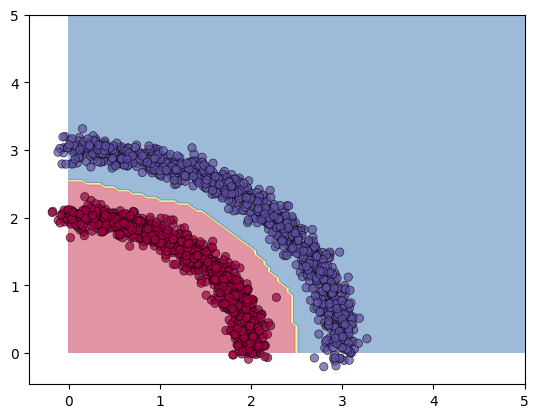

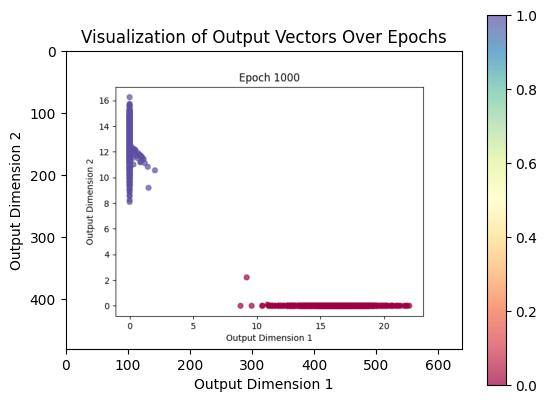

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import os

# Convert the generated data to PyTorch tensors
inputs = torch.cat([torch.Tensor(class_0_x).view(-1, 1), torch.Tensor(class_0_y).view(-1, 1)], dim=1)
labels_0 = torch.zeros(num_points, dtype=torch.long)

inputs_1 = torch.cat([torch.Tensor(class_1_x).view(-1, 1), torch.Tensor(class_1_y).view(-1, 1)], dim=1)
labels_1 = torch.ones(num_points, dtype=torch.long)

inputs = torch.cat([inputs, inputs_1], dim=0)
labels = torch.cat([labels_0, labels_1], dim=0)

# Shuffle the data
indices = torch.randperm(len(inputs))
inputs = inputs[indices]
labels = labels[indices]

# Define the FFN model
class FFNModel(nn.Module):
    def __init__(self):
        super(FFNModel, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        # x = self.fc1(x)
        # x = self.fc2(x)
        # x = self.fc3(x)
        # x = self.fc4(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        return x

# Instantiate the model, loss function, and optimizer
model = FFNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# List to store intermediate output vectors
output_vectors_list = []

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)

    # Save the intermediate output vectors
    output_vectors_list.append(outputs.detach().numpy())

    # Compute the loss
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).float().mean().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Convert the list of output vectors to a numpy array
output_vectors_array = np.array(output_vectors_list)
# Create a directory to store frames
os.makedirs('output_frames', exist_ok=True)

def plot_decision_boundary(model, x_min, x_max, y_min, y_max):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_tensor = torch.cat([torch.Tensor(xx.ravel()).view(-1, 1), torch.Tensor(yy.ravel()).view(-1, 1)], dim=1)
    pred_labels = model(grid_tensor).argmax(dim=1).numpy().reshape(xx.shape)
    plt.contourf(xx, yy, pred_labels, cmap=plt.cm.Spectral, alpha=0.5)

# ... (previous code)

# Visualize the output vectors and save frames
for epoch in range(0, num_epochs, 1):  # Visualize every 10 epochs
    plt.scatter(output_vectors_array[epoch, :, 0], output_vectors_array[epoch, :, 1], c=labels, cmap=plt.cm.Spectral, alpha=0.7)
    plt.title(f'Epoch {epoch+1}')
    plt.xlabel('Output Dimension 1')
    plt.ylabel('Output Dimension 2')
    plt.savefig(f'output_frames/frame_{epoch}.png')
    plt.close()
plot_decision_boundary_with_inputs(model, inputs, labels, 0, 5, 0, 5)

# Create a GIF from the saved frames
fig, ax = plt.subplots()
frames = []

for epoch in range(0, num_epochs, 1):  # Visualize every 10 epochs
    img = plt.imread(f'output_frames/frame_{epoch}.png')
    frames.append([ax.imshow(img)])

ani = animation.ArtistAnimation(fig, frames, interval=100, blit=True)
plt.colorbar(scatter, ax=ax)
plt.title('Visualization of Output Vectors Over Epochs')
plt.xlabel('Output Dimension 1')
plt.ylabel('Output Dimension 2')

# Save the animation as a GIF
ani.save('output_vectors_animation.gif', writer='imagemagick', fps=10)

# Display the final GIF
plt.show()

In [26]:
def plot_decision_boundary_with_inputs(model, inputs, labels, x_min, x_max, y_min, y_max):
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_tensor = torch.cat([torch.Tensor(xx.ravel()).view(-1, 1), torch.Tensor(yy.ravel()).view(-1, 1)], dim=1)
    pred_labels = model(grid_tensor).argmax(dim=1).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, pred_labels, cmap=plt.cm.Spectral, alpha=0.5)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap=plt.cm.Spectral, alpha=0.7, edgecolors='k', linewidth=0.5)




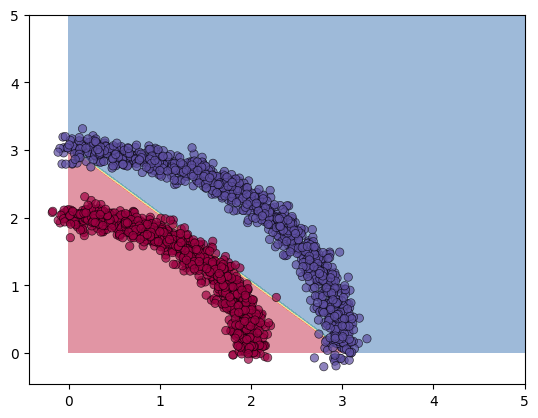

In [27]:
plot_decision_boundary_with_inputs(model, inputs, labels, 0, 5, 0, 5)


In [36]:
np.array(output_vectors_list[-1])

array([[ 2.2841704, -2.3087623],
       [-3.8584716,  2.2563598],
       [ 2.43081  , -2.420694 ],
       ...,
       [-2.5493584,  1.266745 ],
       [ 2.5460653, -2.5573525],
       [ 2.4589226, -2.5020843]], dtype=float32)